In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_PATH = '/content/train.csv'

In [ ]:
# --- Load the dataset ---
df = pd.read_csv(DATA_PATH)
print("Dataset loaded successfully!")
print(f"Shape of the dataset: {df.shape}")

Dataset loaded successfully!
Shape of the dataset: (28303, 16)



--- Dataset Head ---
   Unnamed: 0     ACC  Kingdom  Partition  Membrane  Cytoplasm  Nucleus  \
0           0  Q28165  Metazoa          4       0.0        1.0      1.0   
1           1  Q86U42  Metazoa          4       0.0        1.0      1.0   
2           2  Q0GA42  Metazoa          3       1.0        0.0      0.0   
3           3  P82349  Metazoa          1       1.0        1.0      0.0   
4           4  Q7L5N1  Metazoa          1       0.0        1.0      1.0   

   Extracellular  Cell membrane  Mitochondrion  Plastid  \
0            0.0            0.0            0.0      0.0   
1            0.0            0.0            0.0      0.0   
2            0.0            1.0            0.0      0.0   
3            0.0            1.0            0.0      0.0   
4            0.0            0.0            0.0      0.0   

   Endoplasmic reticulum  Lysosome/Vacuole  Golgi apparatus  Peroxisome  \
0                    0.0               0.0              0.0         0.0   
1                    0

/tmp/ipython-input-3594021956.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


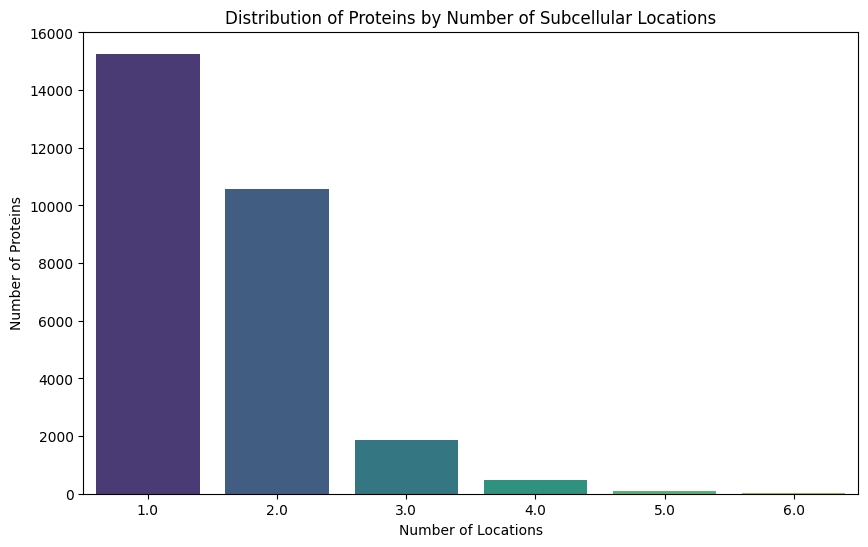


--- Analysis of Sequence Lengths ---
count    28303.000000
mean       556.901141
std        558.491431
min         40.000000
25%        261.000000
50%        433.000000
75%        681.000000
max      34350.000000
Name: sequence_length, dtype: float64


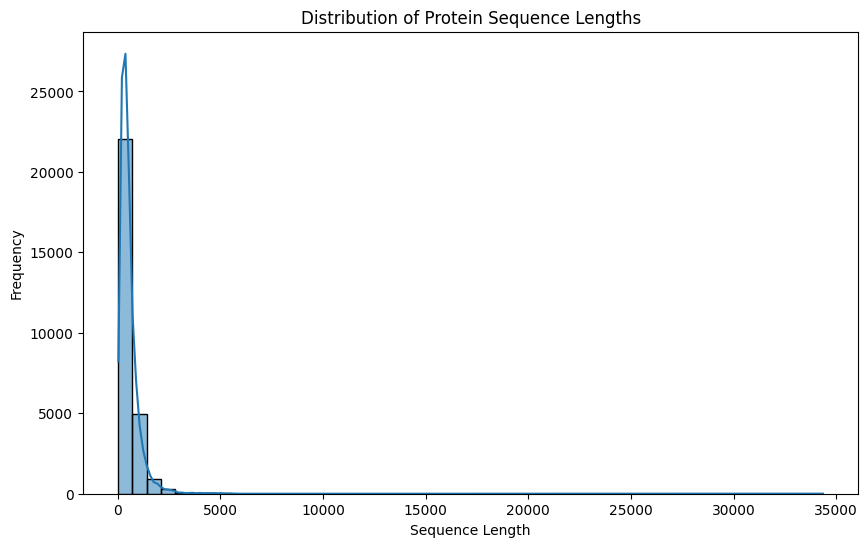

In [ ]:
# --- Perform Basic Exploration ---
if 'df' in locals():
    print("\n--- Dataset Head ---")
    print(df.head())

    print("\n--- Basic Information ---")
    df.info()

    # --- Analyze the Target Variable: Protein Locations ---
    print("\n--- Distribution of Protein Locations ---")
    # Sum the location columns to find the number of locations a protein is in
    location_columns = ['Membrane', 'Cytoplasm', 'Nucleus', 'Extracellular', 'Cell membrane',
                        'Mitochondrion', 'Plastid', 'Endoplasmic reticulum', 'Lysosome/Vacuole',
                        'Golgi apparatus', 'Peroxisome']
    df['num_locations'] = df[location_columns].sum(axis=1)

    # Count the number of proteins per number of locations
    location_counts = df['num_locations'].value_counts().sort_index()
    print(location_counts)

    # --- Visualize the Distribution ---
    plt.figure(figsize=(10, 6))
    sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
    plt.title('Distribution of Proteins by Number of Subcellular Locations')
    plt.xlabel('Number of Locations')
    plt.ylabel('Number of Proteins')
    plt.xticks(rotation=0) # Keep labels horizontal for better readability
    plt.show()


    # --- Analyze Sequence Length ---
    df['sequence_length'] = df['Sequence'].apply(len)
    print("\n--- Analysis of Sequence Lengths ---")
    print(df['sequence_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.histplot(df['sequence_length'], bins=50, kde=True)
    plt.title('Distribution of Protein Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.show()